In [1]:
import torch
import clip
from PIL import Image
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
from latex import latexify
latexify(columns = 2)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [3]:
model, preprocess = clip.load("ViT-B/32", device = device)

In [4]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x17d90faf0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [5]:
model

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [55]:
classes = ['cat', 'dog', 'horse', 'bear', 'teddy', 'animal', 'grizzly', 'beast']
text_descriptions = [f"This is a photo of a {label}" for label in classes]
text_tokens = clip.tokenize(text_descriptions).to(device)

In [56]:
text_tokens[0]

tensor([49406,   589,   533,   320,  1125,   539,   320,  2368, 49407,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0], dtype=torch.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 224, 224])


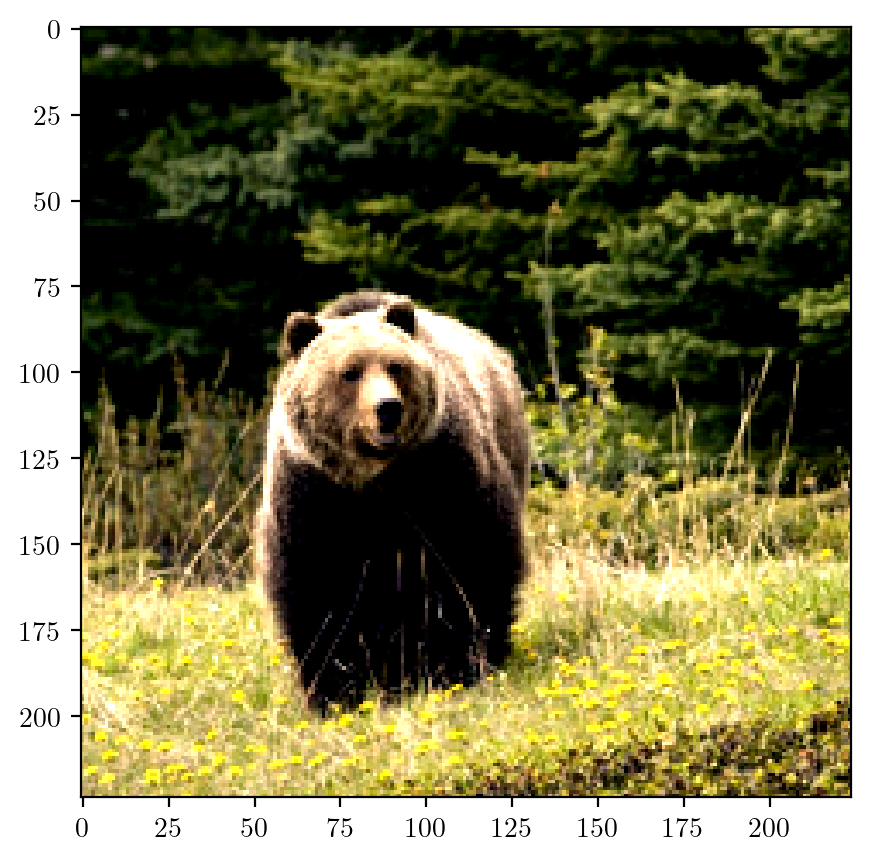

In [57]:
image = preprocess(Image.open("./Graphics/Bear.jpg")).unsqueeze(0).to(device)
image = (image + 1) / 2
print(image.shape)
plt.figure(figsize = (5, 5))
plt.imshow(image[0].cpu().numpy().transpose(1, 2, 0))
plt.show()

In [58]:
image = image * 2 - 1
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim = -1, keepdim = True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim = -1)

In [59]:
text_features.shape, image_features.shape, text_probs.shape

(torch.Size([8, 512]), torch.Size([1, 512]), torch.Size([1, 8]))

In [60]:
text_probs

tensor([[0.0000e+00, 1.3509e-42, 7.0065e-45, 2.4383e-05, 5.7420e-28, 2.6189e-27,
         9.9998e-01, 5.2554e-39]])

In [61]:
text_features[0]

tensor([ 2.9391e-02,  1.8662e-02, -3.6106e-02, -3.2775e-02, -2.7309e-02,
         1.8589e-02, -2.3576e-02, -6.7984e-02, -7.0380e-03,  8.8352e-03,
        -7.2709e-03, -4.5614e-02,  1.3629e-02, -7.4759e-03,  9.9247e-03,
         1.2134e-02,  1.3919e-03, -2.6412e-02,  8.0849e-03,  1.4764e-02,
         3.0581e-02,  8.7883e-03,  4.4205e-02,  1.8554e-03, -9.6473e-03,
         8.7642e-03,  3.0327e-02,  4.9206e-02, -1.3638e-02, -2.3867e-02,
         2.6190e-02,  1.7927e-02,  2.0201e-02,  4.6966e-02, -1.8135e-04,
        -1.4560e-02,  2.2122e-02, -2.6487e-03,  2.3465e-02,  2.0700e-02,
        -1.0134e-02, -1.4897e-02,  2.5235e-02,  8.8085e-03,  1.4193e-02,
         1.3256e-02, -1.9911e-02,  6.4996e-03,  9.9716e-03,  3.8826e-03,
         2.3751e-03,  5.9217e-03,  5.8220e-02, -1.1213e-02, -1.2523e-02,
        -2.3344e-02,  3.6695e-03,  1.7021e-02, -9.3154e-03, -4.5854e-03,
         3.9208e-02, -8.2157e-03, -3.6894e-02,  5.7115e-03,  2.1326e-02,
        -2.2310e-02,  4.7523e-03,  7.8711e-03, -1.2

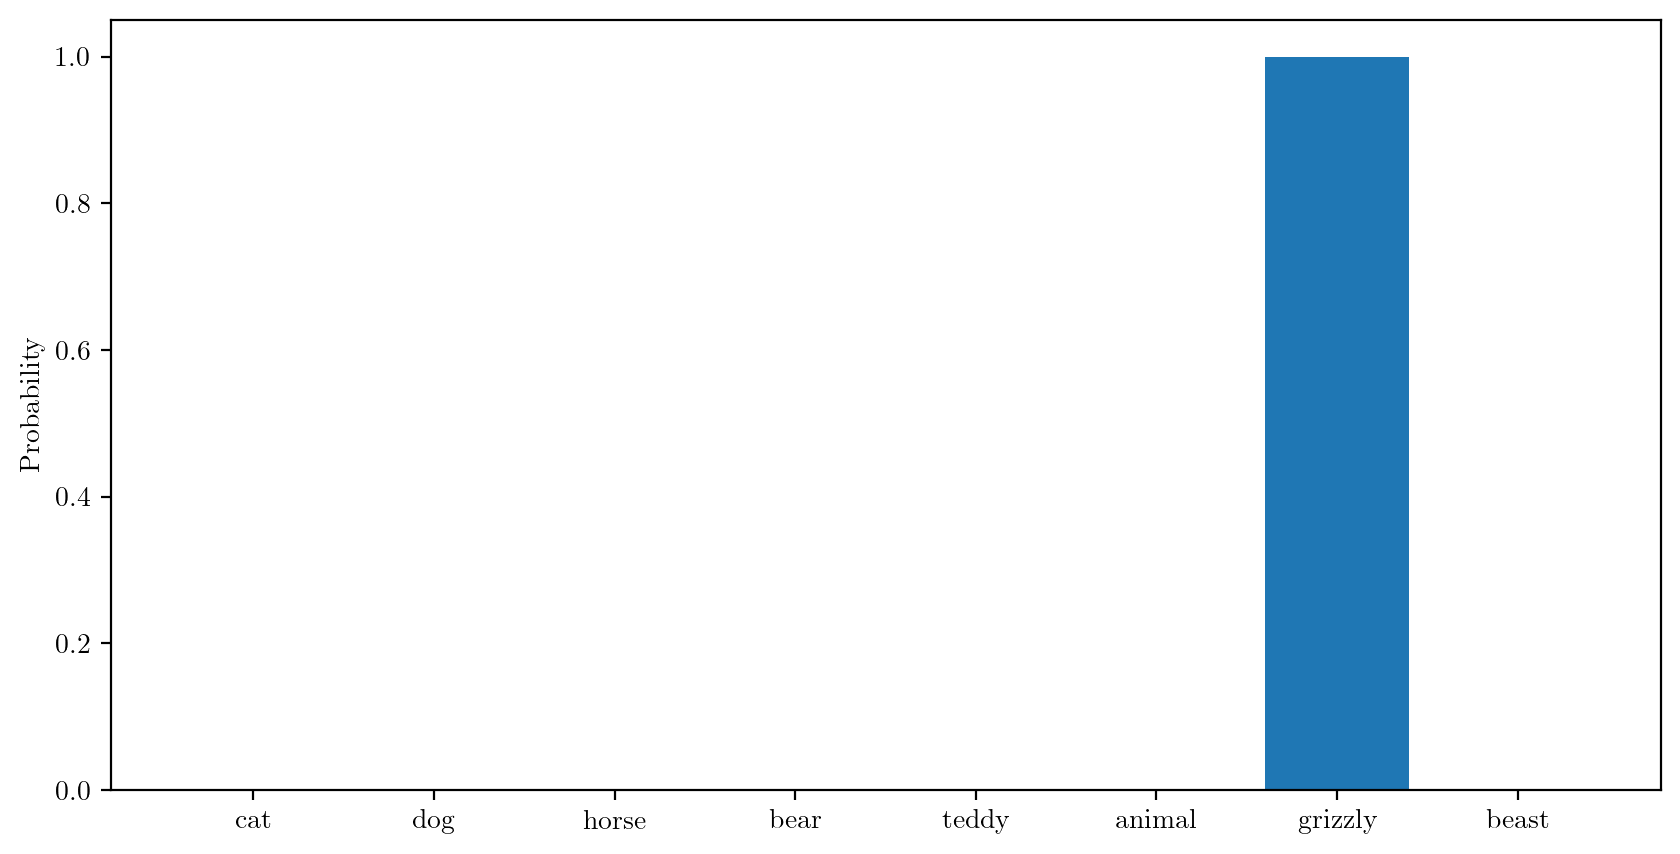

In [63]:
plt.figure(figsize = (10, 5))
plt.bar(classes, text_probs[0].cpu().numpy())
plt.ylabel("Probability")
plt.show()